In [1]:
!pip install numpy matplotlib scikit-learn


# 1. t-SNE Visualization (Figure 2)

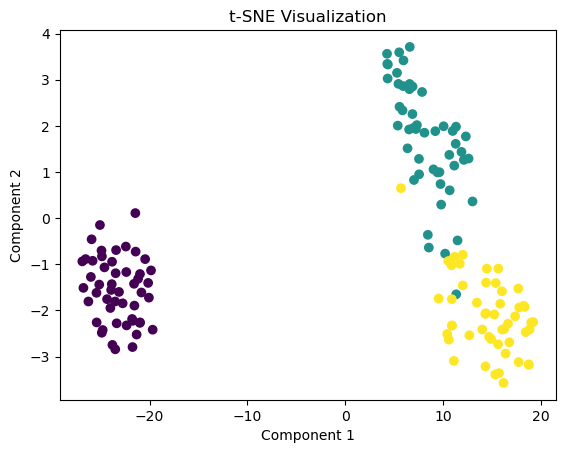

In [2]:
from sklearn.datasets import load_iris
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import os

# Limit the number of threads for OpenBLAS
os.environ['OPENBLAS_NUM_THREADS'] = '1'

# Load data
iris = load_iris()
X = iris.data

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Plot
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=iris.target)
plt.title('t-SNE Visualization')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()


# 2. First Principal Component (Figure 3)

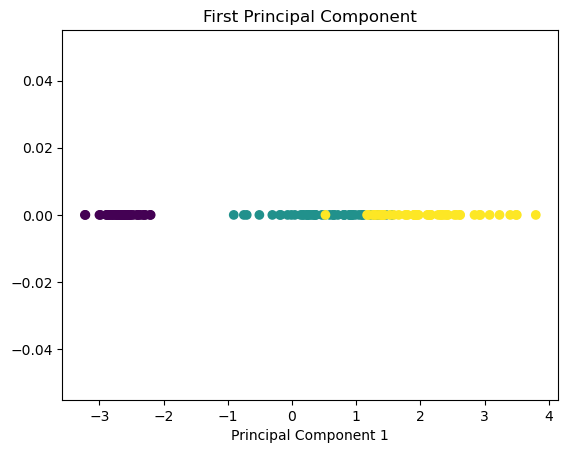

In [3]:
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X)

# Plot
plt.scatter(X_pca, [0] * len(X_pca), c=iris.target)
plt.title('First Principal Component')
plt.xlabel('Principal Component 1')
plt.show()


# 3. First and Second Eigenvectors (Figure 4)

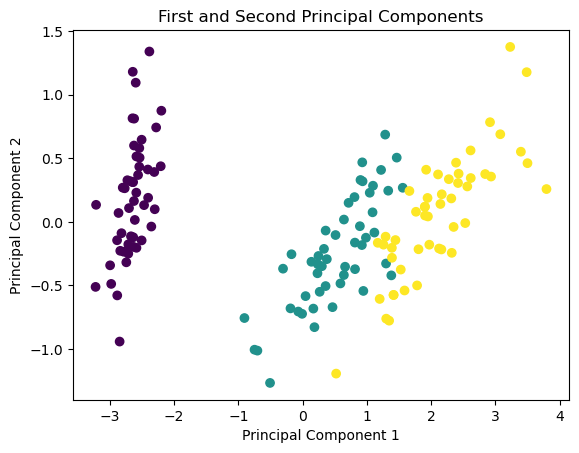

In [4]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=iris.target)
plt.title('First and Second Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


# 4. Dataset Projected onto Eigenvectors (Figure 5)

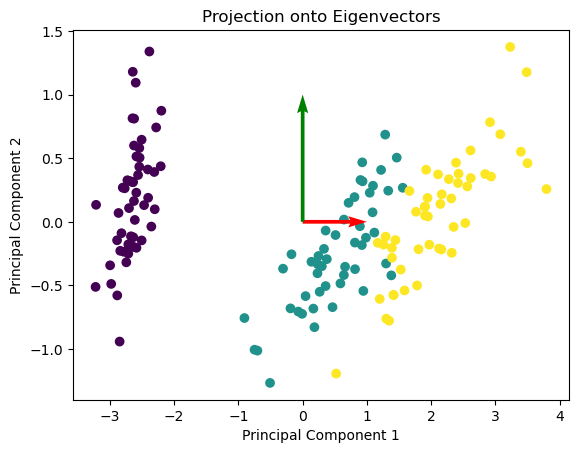

In [5]:
# Same plot as Figure 4 with added variance lines
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=iris.target)
plt.quiver(0, 0, 1, 0, angles='xy', scale_units='xy', scale=1, color='r')
plt.quiver(0, 0, 0, 1, angles='xy', scale_units='xy', scale=1, color='g')
plt.title('Projection onto Eigenvectors')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


# 5. Eigenvalue is Zero (Figure 6)

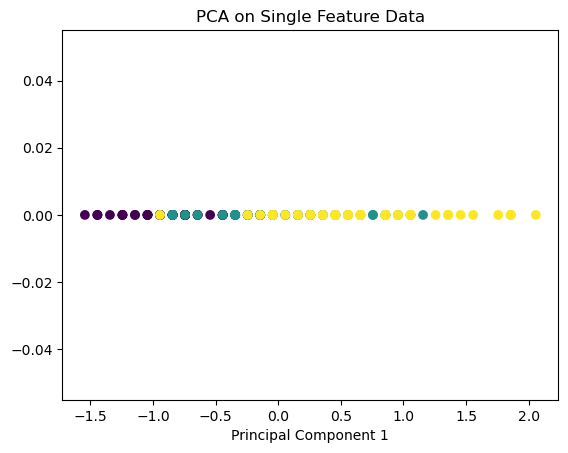

In [7]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn import datasets

# Load the iris dataset
iris = datasets.load_iris()
X = iris.data

# Select only the first feature
X_line = X[:, :1]  # Only the first feature

# Apply PCA with n_components=1
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X_line)

# Plot
plt.scatter(X_pca[:, 0], [0] * len(X_pca), c=iris.target)
plt.title('PCA on Single Feature Data')
plt.xlabel('Principal Component 1')
plt.show()


# 6. Covariance Matrix with Eigenvalues (Figure 7)

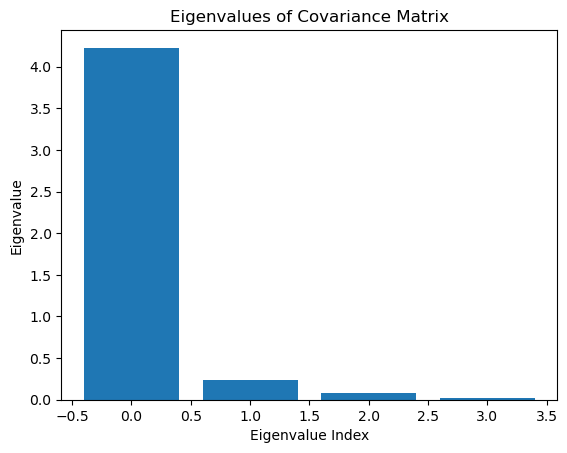

In [8]:
import numpy as np

# Covariance matrix
cov_matrix = np.cov(X.T)
eigenvalues, _ = np.linalg.eig(cov_matrix)

# Plot
plt.bar(range(len(eigenvalues)), eigenvalues)
plt.title('Eigenvalues of Covariance Matrix')
plt.xlabel('Eigenvalue Index')
plt.ylabel('Eigenvalue')
plt.show()


# 7. Classification vs. Regression (Figure 8)

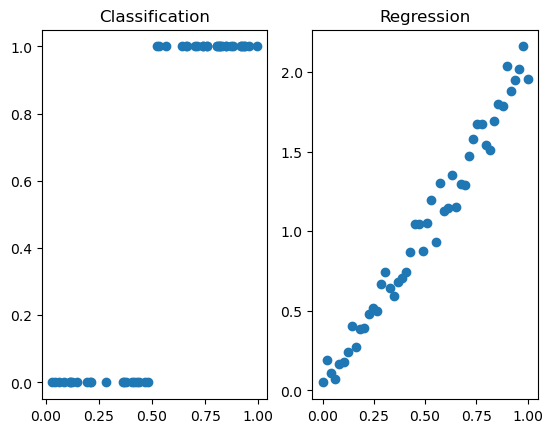

In [9]:
import numpy as np

# Dummy data for classification and regression
x_class = np.random.rand(50)
y_class = np.round(x_class)
x_reg = np.linspace(0, 1, 50)
y_reg = 2 * x_reg + np.random.normal(0, 0.1, 50)

# Plot
plt.subplot(1, 2, 1)
plt.scatter(x_class, y_class)
plt.title('Classification')
plt.subplot(1, 2, 2)
plt.scatter(x_reg, y_reg)
plt.title('Regression')
plt.show()


# 8. Logistic Regression Decision Boundary (Figure 10)

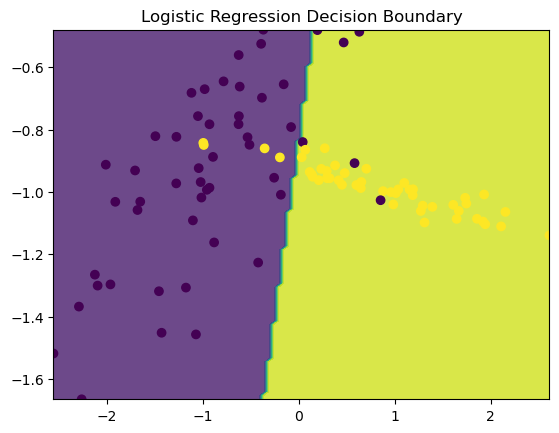

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

# Create a simple dataset
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=1)
model = LogisticRegression()
model.fit(X, y)

# Plot decision boundary
import numpy as np
xx, yy = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), 100),
                     np.linspace(X[:, 1].min(), X[:, 1].max(), 100))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title('Logistic Regression Decision Boundary')
plt.show()


# Dataset with One Eigenvalue Being Zero

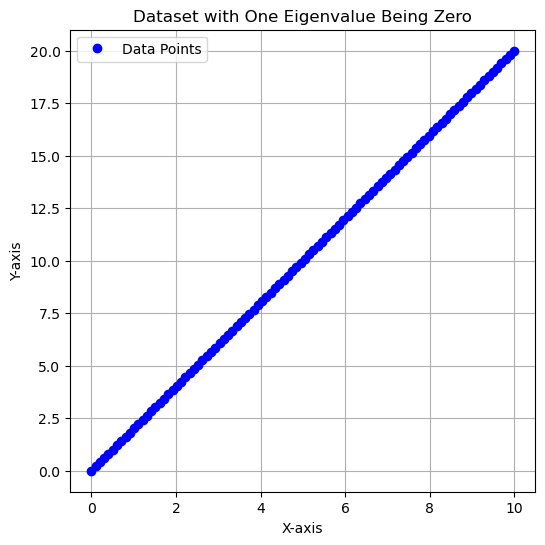

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Generate data points along a line
x = np.linspace(0, 10, 100)
y = 2 * x  # Line with slope 2

# Plot the data
plt.figure(figsize=(6, 6))
plt.plot(x, y, 'bo', label='Data Points')
plt.title('Dataset with One Eigenvalue Being Zero')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.grid(True)
plt.legend()
plt.show()


# Figure 7: Covariance Matrix with Eigenvalues

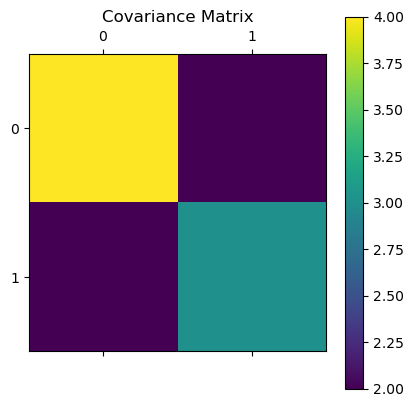

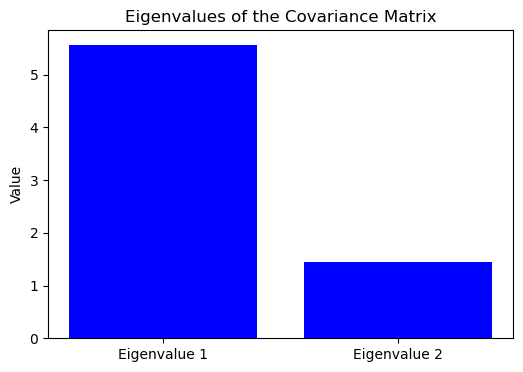

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Define a covariance matrix
cov_matrix = np.array([[4, 2], [2, 3]])

# Compute eigenvalues
eigenvalues, _ = np.linalg.eig(cov_matrix)

# Plot the covariance matrix
plt.matshow(cov_matrix, cmap='viridis')
plt.title('Covariance Matrix')
plt.colorbar()

# Plot the eigenvalues
plt.figure(figsize=(6, 4))
plt.bar(['Eigenvalue 1', 'Eigenvalue 2'], eigenvalues, color='blue')
plt.title('Eigenvalues of the Covariance Matrix')
plt.ylabel('Value')
plt.show()


# Figure 8: Classification vs. Regression

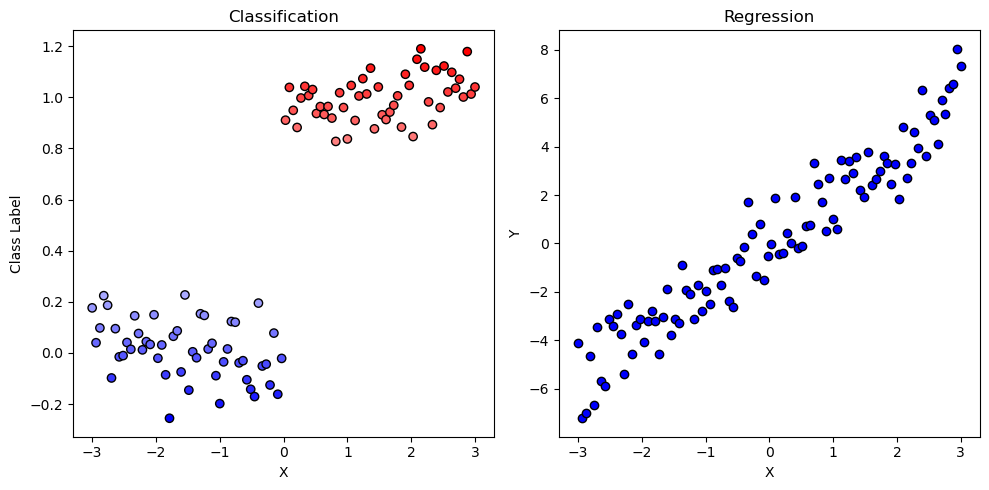

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Generate data for classification
np.random.seed(0)
x_class = np.linspace(-3, 3, 100)
y_class = np.where(x_class > 0, 1, 0) + 0.1 * np.random.randn(100)

# Generate data for regression
x_reg = np.linspace(-3, 3, 100)
y_reg = 2 * x_reg + np.random.randn(100)

# Plot classification
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(x_class, y_class, c=y_class, cmap='bwr', edgecolor='k')
plt.title('Classification')
plt.xlabel('X')
plt.ylabel('Class Label')

# Plot regression
plt.subplot(1, 2, 2)
plt.scatter(x_reg, y_reg, c='blue', edgecolor='k')
plt.title('Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.tight_layout()
plt.show()


# Figure 12: Effect of Noise on KNN

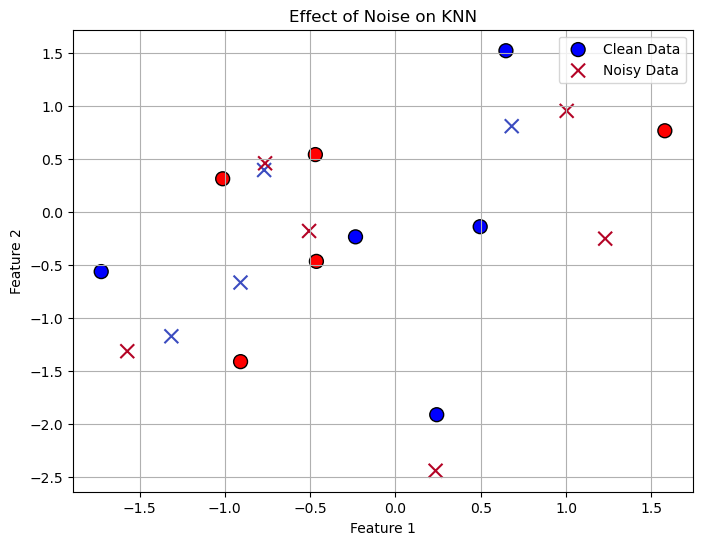

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Generate clean data
np.random.seed(42)
x_clean = np.random.randn(10, 2)
y_clean = np.array([0, 0, 0, 1, 1, 1, 0, 0, 1, 1])

# Generate noisy data
x_noise = x_clean + np.random.randn(10, 2) * 0.5
y_noise = y_clean.copy()
y_noise[::2] = 1 - y_noise[::2]  # Flip every second label

# Plot clean data
plt.figure(figsize=(8, 6))
plt.scatter(x_clean[:, 0], x_clean[:, 1], c=y_clean, cmap='bwr', label='Clean Data', edgecolor='k', s=100)

# Plot noisy data
plt.scatter(x_noise[:, 0], x_noise[:, 1], c=y_noise, cmap='coolwarm', marker='x', label='Noisy Data', s=100)

plt.title('Effect of Noise on KNN')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()


# Figure 14: Training and Validation Loss Curve

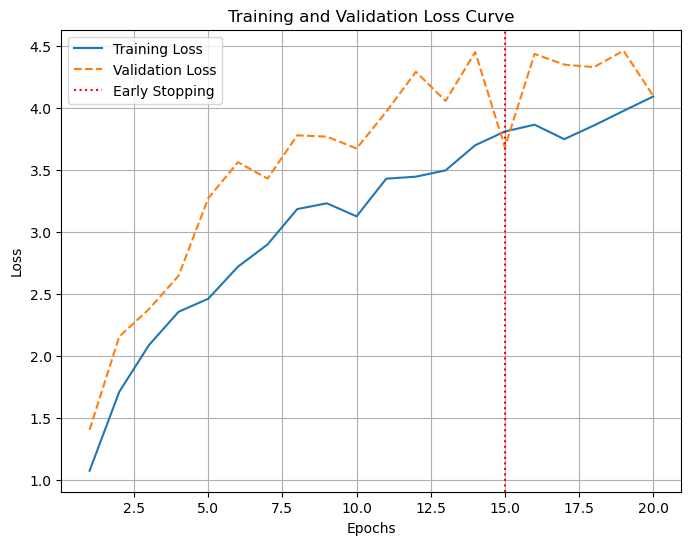

In [15]:
import matplotlib.pyplot as plt

# Simulated training and validation loss
epochs = np.arange(1, 21)
train_loss = np.log(epochs) + np.random.randn(20) * 0.1 + 1
val_loss = np.log(epochs) + np.random.randn(20) * 0.2 + 1.5

# Plot the loss curves
plt.figure(figsize=(8, 6))
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss', linestyle='--')
plt.axvline(x=15, color='r', linestyle=':', label='Early Stopping')
plt.title('Training and Validation Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


# Figure 15: Effect of Non-Linear Activation Functions

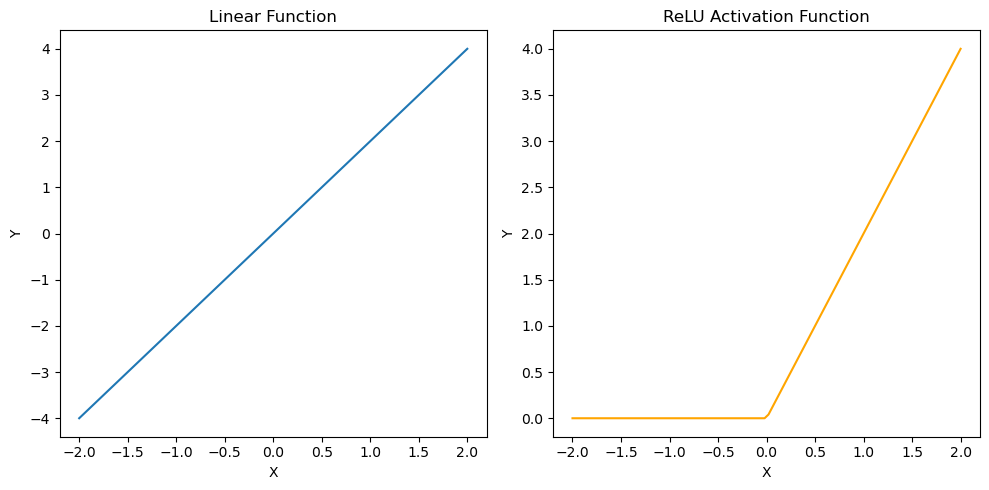

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a linear relationship
x = np.linspace(-2, 2, 100)
y_linear = 2 * x

# Apply a non-linear activation function (ReLU)
y_relu = np.maximum(0, y_linear)

# Plot the linear function
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(x, y_linear, label='Linear Function')
plt.title('Linear Function')
plt.xlabel('X')
plt.ylabel('Y')

# Plot the ReLU function
plt.subplot(1, 2, 2)
plt.plot(x, y_relu, label='ReLU Activation', color='orange')
plt.title('ReLU Activation Function')
plt.xlabel('X')
plt.ylabel('Y')

plt.tight_layout()
plt.show()


# Figure 16: Effect of Different Learning Rates on Convergence

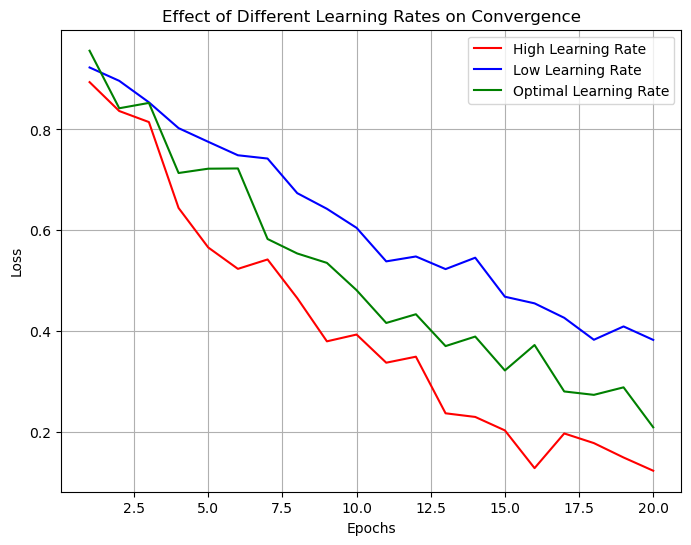

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Simulated loss values for different learning rates
epochs = np.arange(1, 21)
loss_high_lr = np.exp(-0.1 * epochs) + np.random.randn(20) * 0.05
loss_low_lr = np.exp(-0.05 * epochs) + np.random.randn(20) * 0.02
loss_optimal_lr = np.exp(-0.07 * epochs) + np.random.randn(20) * 0.03

# Plot the loss curves
plt.figure(figsize=(8, 6))
plt.plot(epochs, loss_high_lr, label='High Learning Rate', color='red')
plt.plot(epochs, loss_low_lr, label='Low Learning Rate', color='blue')
plt.plot(epochs, loss_optimal_lr, label='Optimal Learning Rate', color='green')
plt.title('Effect of Different Learning Rates on Convergence')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


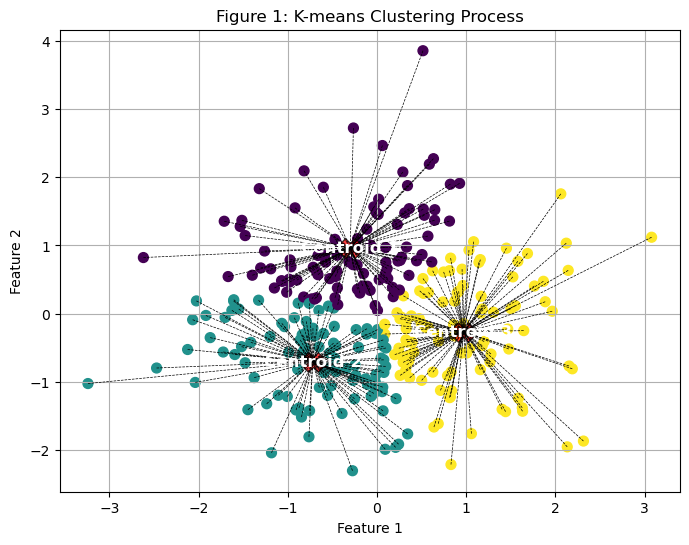

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Generate synthetic data
np.random.seed(42)
X = np.random.randn(300, 2)

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

# Plot the centroids
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=0.75, marker='X', edgecolor='black')

# Annotations for the centroids
for i, (x, y) in enumerate(centroids):
    plt.text(x, y, f'Centroid {i+1}', fontsize=12, ha='center', va='center', color='white', weight='bold')

# Plotting lines from points to their respective centroids
for i in range(len(X)):
    plt.plot([X[i, 0], centroids[y_kmeans[i], 0]], [X[i, 1], centroids[y_kmeans[i], 1]], 'k--', lw=0.5)

# Titles and labels
plt.title('Figure 1: K-means Clustering Process')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()
